In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
path = "./realestate.csv"
df = pd.read_csv(path)
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
#any missing values?
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

No
False    414
Name: No, dtype: int64

X1 transaction date
False    414
Name: X1 transaction date, dtype: int64

X2 house age
False    414
Name: X2 house age, dtype: int64

X3 distance to the nearest MRT station
False    414
Name: X3 distance to the nearest MRT station, dtype: int64

X4 number of convenience stores
False    414
Name: X4 number of convenience stores, dtype: int64

X5 latitude
False    414
Name: X5 latitude, dtype: int64

X6 longitude
False    414
Name: X6 longitude, dtype: int64

Y house price of unit area
False    414
Name: Y house price of unit area, dtype: int64



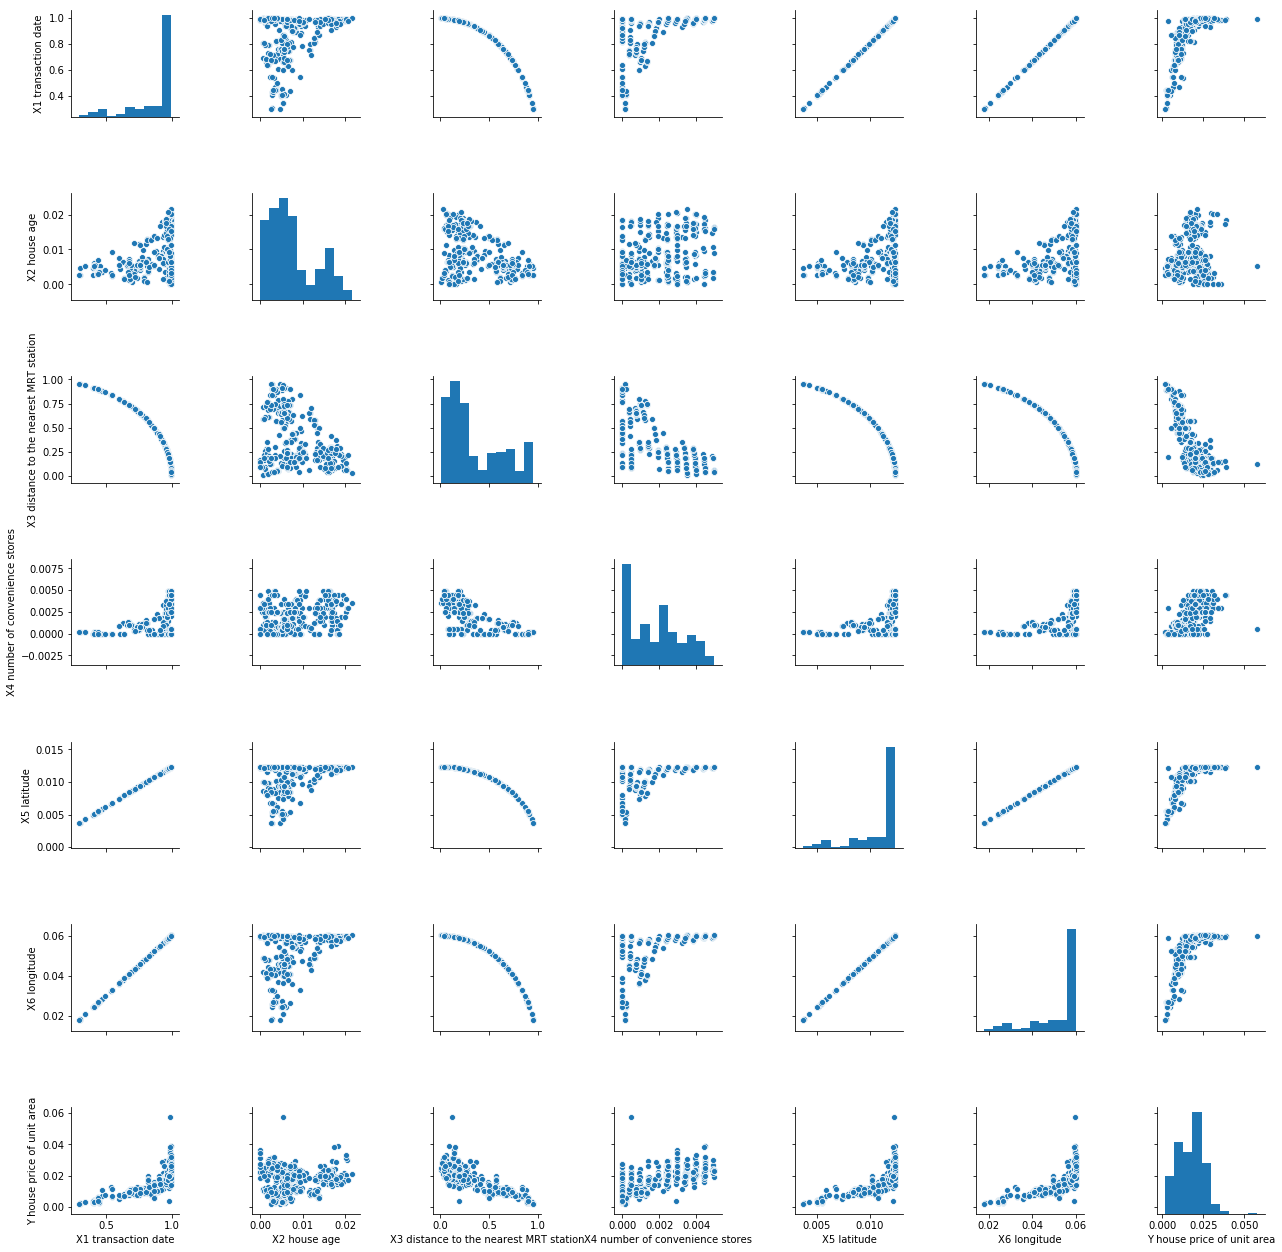

In [4]:
#凑个图
from sklearn import preprocessing

df1 = df.iloc[:,1:8]
df1_nor = preprocessing.normalize(df1)
df1_nor = pd.DataFrame(df1_nor)
df1_nor.columns = df1.columns
sns.pairplot(df1_nor)

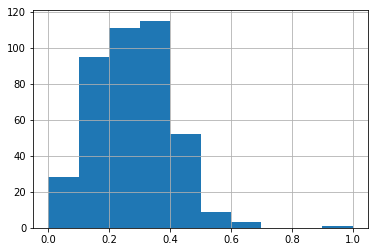

In [5]:
#Data Normalization using min-max method 
df1_mmnor = df1.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
#df1_nor.to_csv("./price_nor")
df1_mmnor["Y house price of unit area"].hist()

In [6]:
#Set bins and corresponding labels
Bins = [0, 0.2, 0.4, 0.6, 1]
Labels = ['Low','Medium','Moderately High','High']

#We apply the function "cut" the determine what each value of "df['Overall']" belongs to.
df1_mmnor["Y house price of unit area"] = pd.cut(df1_mmnor["Y house price of unit area"], bins=Bins, labels=Labels, include_lowest=True)

In [7]:
df1_mmnor.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,0.272926,0.730594,0.009513,1.0,0.616941,0.719323,Medium
1,0.272926,0.445205,0.043809,0.9,0.584949,0.711451,Medium
2,1.000000,0.303653,0.083315,0.5,0.671231,0.758896,Medium
3,0.909389,0.303653,0.083315,0.5,0.671231,0.758896,Moderately High
4,0.181223,0.114155,0.056799,0.5,0.573194,0.743153,Medium


In [8]:
df1_mmnor.to_csv("./bins.csv")